# Merging

Files needed = (dogs.csv, steps.csv and ml-latest-small.zip from [here](https://grouplens.org/datasets/movielens/))

We will often find ourselves with variables spread across different datasets and files. We *merge* datasets together by matching up the two datasets on one or more variables. For example, I might have GDP data by country from the Penn World Tables, and demographic data by country from the World Bank. We would merge these two datasets and match up the observations by country. 

Some of the most powerful analysis comes from combining data from different sources. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### The data

Let's load the 'dogs.csv' file that tracks the snacks and walks for Buster, Su and Jax. 

In [2]:
dogs = pd.read_csv('dogs.csv', parse_dates=['time'])
dogs.dtypes

dog              object
var              object
time     datetime64[ns]
value             int64
dtype: object

In [3]:
dogs.sample(5)

dog     var       time  value
18  Buster  snacks 2018-10-07      2
15  Buster   walks 2018-10-07      3
17  Buster  snacks 2018-10-06      3
2   Buster  snacks 2018-10-01      4
33     Jax  snacks 2018-10-04      5

The data are stacked. I move everything but the values into the index, and then unstack 'var'. 

In [4]:
dogs = dogs.set_index(['dog', 'time', 'var'])
dogs = dogs.unstack('var')
dogs

value      
var               snacks walks
dog    time                   
Buster 2018-10-01    4.0   2.0
       2018-10-02    3.0   2.0
       2018-10-03    4.0   NaN
       2018-10-04    5.0   2.0
       2018-10-05    4.0   3.0
       2018-10-06    3.0   1.0
       2018-10-07    2.0   3.0
Jax    2018-10-04    5.0   3.0
       2018-10-05    5.0   2.0
       2018-10-06    5.0   2.0
       2018-10-07    7.0   3.0
Su     2018-10-01    3.0   2.0
       2018-10-02    4.0   2.0
       2018-10-03    4.0   2.0
       2018-10-04    3.0   3.0
       2018-10-05    3.0   2.0
       2018-10-06    4.0   4.0
       2018-10-07    2.0   1.0

I do not like the nuisance index level 'value' so I remove it. 

Then I reset the index.

In [5]:
dogs = dogs.droplevel(0, axis=1)
dogs = dogs.reset_index()
dogs

var     dog       time  snacks  walks
0    Buster 2018-10-01     4.0    2.0
1    Buster 2018-10-02     3.0    2.0
2    Buster 2018-10-03     4.0    NaN
3    Buster 2018-10-04     5.0    2.0
4    Buster 2018-10-05     4.0    3.0
5    Buster 2018-10-06     3.0    1.0
6    Buster 2018-10-07     2.0    3.0
7       Jax 2018-10-04     5.0    3.0
8       Jax 2018-10-05     5.0    2.0
9       Jax 2018-10-06     5.0    2.0
10      Jax 2018-10-07     7.0    3.0
11       Su 2018-10-01     3.0    2.0
12       Su 2018-10-02     4.0    2.0
13       Su 2018-10-03     4.0    2.0
14       Su 2018-10-04     3.0    3.0
15       Su 2018-10-05     3.0    2.0
16       Su 2018-10-06     4.0    4.0
17       Su 2018-10-07     2.0    1.0

### Steps data

I bought activity trackers for the team and their steps are recorded in an app. I downloaded their step data, and would like to add it to the dogs DataFrame. Let's load the steps file into a DataFrame and *merge* the two DataFrames. 

In [6]:
steps = pd.read_csv('steps.csv', parse_dates=['date'])
steps.sample(5)

date     dog  steps
21 2018-10-05     Jax    510
24 2018-10-08     Jax    605
6  2018-10-07  Buster    405
3  2018-10-04  Buster    550
5  2018-10-06  Buster    377

Steps is already in good shape. 

### Merge the two DataFrames into one DataFrame
We want to match the two DataFrames together according to the dog-date pairs. 
In database-ese, we refer to variables we are matching as **keys.** So, in our case, the keys are dog and date. 

We also need to tell pandas how to treat keys that are not present in both databases. The different types of 'join' (more database-ese) are

1. **inner**: keep the intersection of the keys
2. **left**: keep all the keys from the left DataFrame
3. **right**: keep all the keys from right DataFrame
4. **outer**: keep all the keys from both DataFrames

We specify the join type with the `how` parameter. The default is inner, but for sanity's sake, be explicit about your join.

Before we merge, let's review the two DataFrames.

In [7]:
print(dogs.head(2), '\n\n')
print(steps.head(2), '\n\n')
print('dogs has {0} rows and steps has {1} rows'.format(dogs.shape, steps.shape))

var     dog       time  snacks  walks
0    Buster 2018-10-01     4.0    2.0
1    Buster 2018-10-02     3.0    2.0 


        date     dog  steps
0 2018-10-01  Buster    503
1 2018-10-02  Buster    457 


dogs has (18, 4) rows and steps has (26, 3) rows


* Both DataFrames have a column named `dog` that holds the dog names
* The columns holding the date data have different names in the DataFrames
* The DataFrames have different numbers of observations

Let's see how `.merge()` handles these issues. 

### Inner merge

* Use `left` and `right` to label the DataFrames to merge
* Use `left_on` and `right_on` to identify the columns with keys. It's not a problem that one column is called 'dates' and the other 'time'

In [8]:
dogs_inner = pd.merge(left=dogs, right=steps, left_on=['dog', 'time'], right_on=['dog', 'date'], how='inner')
dogs_inner

dog       time  snacks  walks       date  steps
0   Buster 2018-10-01     4.0    2.0 2018-10-01    503
1   Buster 2018-10-02     3.0    2.0 2018-10-02    457
2   Buster 2018-10-03     4.0    NaN 2018-10-03    299
3   Buster 2018-10-04     5.0    2.0 2018-10-04    550
4   Buster 2018-10-05     4.0    3.0 2018-10-05    476
5   Buster 2018-10-06     3.0    1.0 2018-10-06    377
6   Buster 2018-10-07     2.0    3.0 2018-10-07    405
7      Jax 2018-10-04     5.0    3.0 2018-10-04    465
8      Jax 2018-10-05     5.0    2.0 2018-10-05    510
9      Jax 2018-10-06     5.0    2.0 2018-10-06    563
10     Jax 2018-10-07     7.0    3.0 2018-10-07    549
11      Su 2018-10-01     3.0    2.0 2018-10-01    499
12      Su 2018-10-02     4.0    2.0 2018-10-02    468
13      Su 2018-10-04     3.0    3.0 2018-10-04    350
14      Su 2018-10-05     3.0    2.0 2018-10-05    537
15      Su 2018-10-06     4.0    4.0 2018-10-06    325
16      Su 2018-10-07     2.0    1.0 2018-10-07    387

The merged DataFrame has 17 rows&mdash;less than either of the DataFrames we started with. There are some rows that are only in `dogs` and some rows that are only in `steps`. Those rows are not included in the merged DataFrame when we use an inner merge. 

### Outer merge

An outer merge keeps all the keys&mdash;we do not lose any observations. I am adding the `indicator` to help us see how the two DataFrames compare. 

In [9]:
dogs_outer = pd.merge(left=dogs, right=steps, 
                      left_on=['dog', 'time'], right_on=['dog', 'date'], 
                      how='outer', indicator=True)
dogs_outer

dog       time  snacks  walks       date  steps      _merge
0   Buster 2018-10-01     4.0    2.0 2018-10-01  503.0        both
1   Buster 2018-10-02     3.0    2.0 2018-10-02  457.0        both
2   Buster 2018-10-03     4.0    NaN 2018-10-03  299.0        both
3   Buster 2018-10-04     5.0    2.0 2018-10-04  550.0        both
4   Buster 2018-10-05     4.0    3.0 2018-10-05  476.0        both
5   Buster 2018-10-06     3.0    1.0 2018-10-06  377.0        both
6   Buster 2018-10-07     2.0    3.0 2018-10-07  405.0        both
7      Jax 2018-10-04     5.0    3.0 2018-10-04  465.0        both
8      Jax 2018-10-05     5.0    2.0 2018-10-05  510.0        both
9      Jax 2018-10-06     5.0    2.0 2018-10-06  563.0        both
10     Jax 2018-10-07     7.0    3.0 2018-10-07  549.0        both
11      Su 2018-10-01     3.0    2.0 2018-10-01  499.0        both
12      Su 2018-10-02     4.0    2.0 2018-10-02  468.0        both
13      Su 2018-10-03     4.0    2.0        NaT    NaN   left_only
14      Su 2018-10-04     3.0    3.0 2018-10-04  350.0        both
15      Su 2018-10-05     3.0    2.0 2018-10-05  537.0        both
16      Su 2018-10-06     4.0    4.0 2018-10-06  325.0        both
17      Su 2018-10-07     2.0    1.0 2018-10-07  387.0        both
18  Buster        NaT     NaN    NaN 2018-10-08  425.0  right_only
19  Buster        NaT     NaN    NaN 2018-10-09  512.0  right_only
20      Su        NaT     NaN    NaN 2018-10-08  450.0  right_only
21      Su        NaT     NaN    NaN 2018-10-09  515.0  right_only
22     Jax        NaT     NaN    NaN 2018-10-01  475.0  right_only
23     Jax        NaT     NaN    NaN 2018-10-02  450.0  right_only
24     Jax        NaT     NaN    NaN 2018-10-03  501.0  right_only
25     Jax        NaT     NaN    NaN 2018-10-08  605.0  right_only
26     Jax        NaT     NaN    NaN 2018-10-09  465.0  right_only

The `_merge` variables helps us understand the inner merge, too. The observation Su 2018-10-03 is only in `dogs`, so it was dropped in the inner merge. The last nine rows are only in the `steps` data. Notice that pandas filled in NaN and NaT (not a time) where needed. Nice.

### Left merge

This merge keeps all the keys in the left DataFrame and only keeps the keys in the right DataFrame that have matches in the left DataFrame. 

In [10]:
dogs_left = pd.merge(left=dogs, right=steps, 
                     left_on=['dog', 'time'], right_on=['dog', 'date'], 
                     how='left', indicator=True)
dogs_left

dog       time  snacks  walks       date  steps     _merge
0   Buster 2018-10-01     4.0    2.0 2018-10-01  503.0       both
1   Buster 2018-10-02     3.0    2.0 2018-10-02  457.0       both
2   Buster 2018-10-03     4.0    NaN 2018-10-03  299.0       both
3   Buster 2018-10-04     5.0    2.0 2018-10-04  550.0       both
4   Buster 2018-10-05     4.0    3.0 2018-10-05  476.0       both
5   Buster 2018-10-06     3.0    1.0 2018-10-06  377.0       both
6   Buster 2018-10-07     2.0    3.0 2018-10-07  405.0       both
7      Jax 2018-10-04     5.0    3.0 2018-10-04  465.0       both
8      Jax 2018-10-05     5.0    2.0 2018-10-05  510.0       both
9      Jax 2018-10-06     5.0    2.0 2018-10-06  563.0       both
10     Jax 2018-10-07     7.0    3.0 2018-10-07  549.0       both
11      Su 2018-10-01     3.0    2.0 2018-10-01  499.0       both
12      Su 2018-10-02     4.0    2.0 2018-10-02  468.0       both
13      Su 2018-10-03     4.0    2.0        NaT    NaN  left_only
14      Su 2018-10-04     3.0    3.0 2018-10-04  350.0       both
15      Su 2018-10-05     3.0    2.0 2018-10-05  537.0       both
16      Su 2018-10-06     4.0    4.0 2018-10-06  325.0       both
17      Su 2018-10-07     2.0    1.0 2018-10-07  387.0       both

The left merge keeps the observation Su 2018-10-03 even though it doesn't have a match in `steps`. 

The right merge works analogously. 

## Merging on the index

We can also merge on the index. replace the `left_on` and `right_on` with `left_index` and `right_index`.

The names of index columns need to match in this case. 

In [11]:
dogs.rename(columns={'time':'date'}, inplace=True)
dogs.set_index(['dog', 'date'], inplace=True)
steps.set_index(['dog', 'date'], inplace=True)

In [12]:
x = pd.merge(left=dogs, right=steps, left_index=True, right_index=True, how='outer', indicator=True)
x.head(30)

snacks  walks  steps      _merge
dog    date                                        
Buster 2018-10-01     4.0    2.0  503.0        both
       2018-10-02     3.0    2.0  457.0        both
       2018-10-03     4.0    NaN  299.0        both
       2018-10-04     5.0    2.0  550.0        both
       2018-10-05     4.0    3.0  476.0        both
       2018-10-06     3.0    1.0  377.0        both
       2018-10-07     2.0    3.0  405.0        both
       2018-10-08     NaN    NaN  425.0  right_only
       2018-10-09     NaN    NaN  512.0  right_only
Jax    2018-10-01     NaN    NaN  475.0  right_only
       2018-10-02     NaN    NaN  450.0  right_only
       2018-10-03     NaN    NaN  501.0  right_only
       2018-10-04     5.0    3.0  465.0        both
       2018-10-05     5.0    2.0  510.0        both
       2018-10-06     5.0    2.0  563.0        both
       2018-10-07     7.0    3.0  549.0        both
       2018-10-08     NaN    NaN  605.0  right_only
       2018-10-09     NaN    NaN  465.0  right_only
Su     2018-10-01     3.0    2.0  499.0        both
       2018-10-02     4.0    2.0  468.0        both
       2018-10-03     4.0    2.0    NaN   left_only
       2018-10-04     3.0    3.0  350.0        both
       2018-10-05     3.0    2.0  537.0        both
       2018-10-06     4.0    4.0  325.0        both
       2018-10-07     2.0    1.0  387.0        both
       2018-10-08     NaN    NaN  450.0  right_only
       2018-10-09     NaN    NaN  515.0  right_only

## Practice
Head over to [MovieLens](https://grouplens.org/datasets/movielens/) and download the ml-latest-small dataset. It will come as a zipped file. Put it in your user drive (and cwd) and unzip it. You will find 5 files. 


Each user ranks *movies* and can *tag* movies. Users have a `userId` and movies have a `movieId`.
* 'movies.csv' holds the description of movies. An observation is a movie.
* 'ratings.csv' holds user ratings of movies. An observation is a user-movie 
* 'tags.csv' holds the tags a user assigns to a movie. A observation is a user-movie. A user can add more than one tag per movie.

### Movies ratings by genre

Suppose we would like to know if comedies are, on average, rated better than adventure movies. We need data on both ratings and the movie genre. 

1. Load the 'movies.csv' and the 'ratings.csv' files as DataFrames
2. What size are the two DataFrames?

In [13]:
movies = pd.read_csv('ml-latest-small/ml-latest-small/movies.csv')
print(movies.head(2))
print(movies.shape)

   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2    Jumanji (1995)                   Adventure|Children|Fantasy
(9742, 3)


In [14]:
ratings = pd.read_csv('ml-latest-small/ml-latest-small/ratings.csv')
print(ratings.loc[ratings['userId']==1,])
print(ratings.shape)

     userId  movieId  rating  timestamp
0         1        1     4.0  964982703
1         1        3     4.0  964981247
2         1        6     4.0  964982224
3         1       47     5.0  964983815
4         1       50     5.0  964982931
..      ...      ...     ...        ...
227       1     3744     4.0  964980694
228       1     3793     5.0  964981855
229       1     3809     4.0  964981220
230       1     4006     4.0  964982903
231       1     5060     5.0  964984002

[232 rows x 4 columns]
(100836, 4)


3. Merge the two DataFrames. In the new DataFrame, each row should hold the rating of a movie and the movies genres. We want to keep all the observations in the ratings file. Call your merged DataFrame 'ratings_by_genre'. 

4. What size is the resulting DataFrame? Are there any unmatched ratings?

In [15]:
# Each movie shows up several times in the ratings file (each movie is reviewed by many raters)
# We use a left join to keep all the observations in the ratings file 

ratings_by_genre = pd.merge(left=ratings, right=movies, on='movieId', how='left', indicator=True)
print(ratings_by_genre.head(2))
print(ratings_by_genre.shape)

   userId  movieId  rating  timestamp                    title  \
0       1        1     4.0  964982703         Toy Story (1995)   
1       1        3     4.0  964981247  Grumpier Old Men (1995)   

                                        genres _merge  
0  Adventure|Animation|Children|Comedy|Fantasy   both  
1                               Comedy|Romance   both  
(100836, 7)


### Movie ratings by tags

Suppose we would like to know if Disney movies are, on average, rated better than superhero movies. We do not have a genre named "Disney" or "superhero", but some users have tagged movies as Disney and superhero. 

1. Load the 'tags.csv' file.

2. Merge it with the 'ratings' DataFrame. Name this DataFrame `ratings_by_tags`. 

In [16]:
tags = pd.read_csv('ml-latest-small/ml-latest-small/tags.csv')
print(tags.head(2))
print(tags.shape)

   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
(3683, 4)


In [17]:
ratings_by_tags = pd.merge(left=ratings, right=tags, on=['userId', 'movieId'], how='right', indicator=True)
ratings_by_tags.head(2)

userId  movieId  rating   timestamp_x              tag  timestamp_y _merge
0       2    60756     5.0  1.445715e+09            funny   1445714994   both
1       2    60756     5.0  1.445715e+09  Highly quotable   1445714996   both

3. How many tags could be matched with a movie rating? How many rating are untagged?

In [18]:
ratings_by_tags['_merge'].value_counts()

both          3476
right_only     207
left_only        0
Name: _merge, dtype: int64

4. What are the 10 most used tags?

In [19]:
ratings_by_tags['tag'].value_counts().head(10)

In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
surreal               23
Disney                23
religion              22
sci-fi                21
quirky                21
Name: tag, dtype: int64

## Extra practice (try at home)

Are movies tagged Disney better than movies tagged superhero? 

1. Compute the average rating for movies with superhero tags and for movies tagged Disney.

In [20]:
dis = ratings_by_tags[ratings_by_tags['tag']=='Disney']
dis_mean = dis['rating'].mean()

sup = ratings_by_tags[ratings_by_tags['tag']=='superhero']
super_mean = sup['rating'].mean()

# It's close!
print('The Disney mean rating is {0:.3} and the superhero rating is {1:.3}.'.format(dis_mean, super_mean))

The Disney mean rating is 3.54 and the superhero rating is 3.63.


2. Let's see how the ratings of Disney movies compare to superhero movies. We will plot two histograms on the same axes.

    1. Plot the ratings histogram of movies tagged 'Disney'. Use 10 bins. Make the plot blue.
    2. Plot the ratings histogram of superhero movies. Use 10 bins. make the plot red.
    3. Add a legend
    4. Add the mean ratings for superhero movies and for superhero movies as text to the histogram

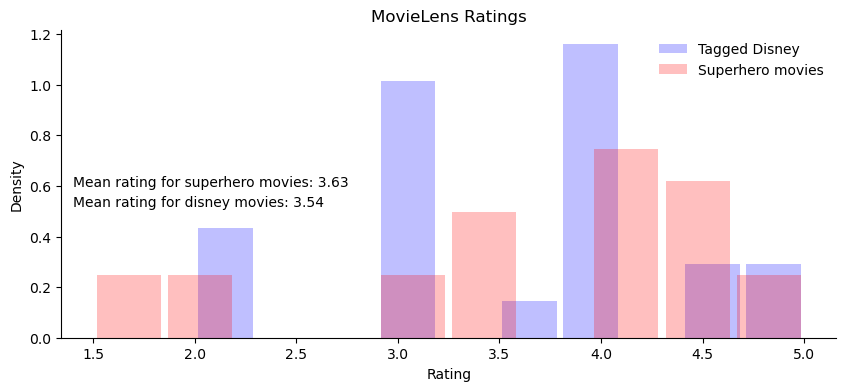

In [21]:
fig, ax = plt.subplots(figsize=(10,4))

# Two histograms one-atop the other
ax.hist(dis['rating'], bins=10, color = 'blue', alpha = 0.25, density=True, label = 'Tagged Disney', rwidth=0.9)
ax.hist(sup['rating'], bins=10, color = 'red', alpha = 0.25, density=True, label = 'Superhero movies', rwidth=0.9)

ax.set_title('MovieLens Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Density')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.text( 1.4, 0.6, 'Mean rating for superhero movies: {0:.3}'.format(super_mean))
ax.text( 1.4, 0.52, 'Mean rating for disney movies: {0:.3}'.format(dis_mean))

ax.legend(frameon=False)
plt.show()

In [22]:
# We do not have many observations, so we shouldn't read too much into this...but, Disney movies have had fewer flops. 
# You could try doing this exercise with the full movie lens dataset. (https://files.grouplens.org/datasets/movielens/ml-latest.zip)  

# We did get some good practice in, though. 